# Import dependencies

In [1]:
# Reload modules whenever underlying code changes
%load_ext autoreload
%autoreload 2

In [2]:
# pdb will automatically run on exceptions
#%pdb on # currently not working due to https://github.com/ipython/ipykernel/issues/422

In [3]:
# import os

# # Only occupy one GPU, as in https://stackoverflow.com/questions/37893755/tensorflow-set-cuda-visible-devices-within-jupyter
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

# # Only allocate GPU memory as needed
# os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

# # Suppress tf warning messages
# os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"

In [4]:
%matplotlib inline
from sgm.dependencies import *


Bad key savefig.frameon in file /home/mgaltier200/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/mgaltier200/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/mgaltier200/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably 

# Initialize untrained agent

In [5]:
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# tf.enable_eager_execution(config=config)

In [6]:
#tf.debugging.set_log_device_placement(True)
#tf.test.is_gpu_available()

In [7]:
tf.reset_default_graph()

In [8]:
from sgm.envs import env_load_fn
from sgm.agent import UvfAgent

# If you change the environment parameters below, make sure to run
# tf.reset_default_graph() in the cell above before training.
max_episode_steps = 20
env_name = 'FourRooms'  # Choose one of the environments shown above. 
resize_factor = 5  # Inflate the environment to increase the difficulty.
thin = True # If True, resize by expanding open space, not walls, to make walls thin
desc_name = "thinned_" + env_name.lower() if thin else env_name.lower()

base_dir = os.path.join(os.getcwd(), os.pardir, "agents")
model_dir = os.path.join(base_dir, desc_name)

tf_env = env_load_fn(env_name, max_episode_steps,
                     resize_factor=resize_factor,
                     terminate_on_timeout=False,
                     thin=thin)
eval_tf_env = env_load_fn(env_name, max_episode_steps,
                          resize_factor=resize_factor,
                          terminate_on_timeout=True,
                          thin=thin)

agent = UvfAgent(
    tf_env.time_step_spec(),
    tf_env.action_spec(),
    max_episode_steps=max_episode_steps,
    use_distributional_rl=True,
    ensemble_size=3)

/home/mgaltier200/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


# Train the agent

In [9]:
from sgm.trainer import train_eval

train_eval(agent,
          tf_env,
           
           
           
           
           
           
           
          eval_tf_env,
          initial_collect_steps=1000,
          eval_interval=1000,
          num_eval_episodes=10,
          num_iterations=30000,
          save_model_dir=model_dir,
          experiment_name=f"{env_name}_coordinate_{max_episode_steps}steps")

INFO:tensorflow:random_seed = 0
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Saving checkpoints to directory /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt
INFO:tensorflow:Creating tensorboard summary writer with directory /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



  3%|▎         | 997/30000 [00:23<10:55, 44.27it/s] 

Saved checkpoint for step 1000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-1
INFO:tensorflow:step = 1000, loss = 2.133171
INFO:tensorflow:45.294 steps/sec
INFO:tensorflow:step = 1000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -16.30
INFO:tensorflow:		 predicted_dist = 16.6 (0.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -18.50
INFO:tensorflow:		 predicted_dist = 16.6 (0.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 16.7 (0.5)
INFO:tensorflow:	 eval_time = 4.13


  7%|▋         | 1996/30000 [00:47<09:48, 47.63it/s]  

Saved checkpoint for step 2000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-2
INFO:tensorflow:step = 2000, loss = 0.771421
INFO:tensorflow:55.383 steps/sec
INFO:tensorflow:step = 2000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -20.00
INFO:tensorflow:		 predicted_dist = 19.0 (0.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -16.20
INFO:tensorflow:		 predicted_dist = 18.8 (0.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 19.0 (0.5)
INFO:tensorflow:	 eval_time = 3.77


 10%|▉         | 2999/30000 [01:12<10:52, 41.39it/s]  

Saved checkpoint for step 3000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-3
INFO:tensorflow:step = 3000, loss = 0.597856
INFO:tensorflow:53.416 steps/sec
INFO:tensorflow:step = 3000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -16.40
INFO:tensorflow:		 predicted_dist = 18.6 (0.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -17.40
INFO:tensorflow:		 predicted_dist = 18.4 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 18.7 (0.7)
INFO:tensorflow:	 eval_time = 3.66


 13%|█▎        | 3996/30000 [01:37<09:31, 45.48it/s]  

Saved checkpoint for step 4000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-4
INFO:tensorflow:step = 4000, loss = 1.121773
INFO:tensorflow:50.988 steps/sec
INFO:tensorflow:step = 4000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -15.00
INFO:tensorflow:		 predicted_dist = 15.6 (1.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -20.00
INFO:tensorflow:		 predicted_dist = 16.6 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.70
INFO:tensorflow:		 predicted_dist = 17.5 (0.8)
INFO:tensorflow:	 eval_time = 3.69


 17%|█▋        | 4998/30000 [02:01<08:39, 48.16it/s]  

Saved checkpoint for step 5000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-5
INFO:tensorflow:step = 5000, loss = 1.304031
INFO:tensorflow:53.098 steps/sec
INFO:tensorflow:step = 5000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -14.40
INFO:tensorflow:		 predicted_dist = 15.4 (1.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -20.00
INFO:tensorflow:		 predicted_dist = 17.5 (0.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.30
INFO:tensorflow:		 predicted_dist = 18.3 (0.4)
INFO:tensorflow:	 eval_time = 3.82


 20%|█▉        | 5996/30000 [02:26<09:03, 44.18it/s]  

Saved checkpoint for step 6000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-6
INFO:tensorflow:step = 6000, loss = 1.262882
INFO:tensorflow:51.772 steps/sec
INFO:tensorflow:step = 6000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -10.30
INFO:tensorflow:		 predicted_dist = 15.4 (1.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -20.00
INFO:tensorflow:		 predicted_dist = 17.2 (0.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 17.8 (0.5)
INFO:tensorflow:	 eval_time = 3.63


 23%|██▎       | 6998/30000 [02:51<08:30, 45.09it/s]  

Saved checkpoint for step 7000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-7
INFO:tensorflow:step = 7000, loss = 1.520283
INFO:tensorflow:52.116 steps/sec
INFO:tensorflow:step = 7000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -13.50
INFO:tensorflow:		 predicted_dist = 14.4 (2.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -20.00
INFO:tensorflow:		 predicted_dist = 16.1 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.00
INFO:tensorflow:		 predicted_dist = 18.4 (0.5)
INFO:tensorflow:	 eval_time = 3.80


 27%|██▋       | 7997/30000 [03:15<08:30, 43.08it/s]  

Saved checkpoint for step 8000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-8
INFO:tensorflow:step = 8000, loss = 2.018602
INFO:tensorflow:53.739 steps/sec
INFO:tensorflow:step = 8000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -14.60
INFO:tensorflow:		 predicted_dist = 12.8 (2.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -20.00
INFO:tensorflow:		 predicted_dist = 16.2 (1.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.70
INFO:tensorflow:		 predicted_dist = 17.9 (0.4)
INFO:tensorflow:	 eval_time = 3.41


 30%|██▉       | 8996/30000 [03:39<07:22, 47.44it/s]  

Saved checkpoint for step 9000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-9
INFO:tensorflow:step = 9000, loss = 1.510514
INFO:tensorflow:53.774 steps/sec
INFO:tensorflow:step = 9000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -12.80
INFO:tensorflow:		 predicted_dist = 14.5 (3.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -18.40
INFO:tensorflow:		 predicted_dist = 17.2 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 17.7 (0.9)
INFO:tensorflow:	 eval_time = 3.27


 33%|███▎      | 9998/30000 [04:03<07:11, 46.33it/s]  

Saved checkpoint for step 10000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-10
INFO:tensorflow:step = 10000, loss = 1.054001
INFO:tensorflow:52.462 steps/sec
INFO:tensorflow:step = 10000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -16.70
INFO:tensorflow:		 predicted_dist = 17.5 (0.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -17.10
INFO:tensorflow:		 predicted_dist = 18.1 (0.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.30
INFO:tensorflow:		 predicted_dist = 18.8 (0.5)
INFO:tensorflow:	 eval_time = 3.42


 37%|███▋      | 10997/30000 [04:28<06:42, 47.19it/s]  

Saved checkpoint for step 11000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-11
INFO:tensorflow:step = 11000, loss = 0.875040
INFO:tensorflow:52.082 steps/sec
INFO:tensorflow:step = 11000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -16.90
INFO:tensorflow:		 predicted_dist = 18.1 (0.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -18.40
INFO:tensorflow:		 predicted_dist = 18.8 (0.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.20
INFO:tensorflow:		 predicted_dist = 19.2 (0.3)
INFO:tensorflow:	 eval_time = 3.52


 40%|███▉      | 11995/30000 [04:54<07:00, 42.85it/s]  

Saved checkpoint for step 12000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-12
INFO:tensorflow:step = 12000, loss = 0.924560
INFO:tensorflow:50.642 steps/sec
INFO:tensorflow:step = 12000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -11.70
INFO:tensorflow:		 predicted_dist = 15.2 (3.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -18.40
INFO:tensorflow:		 predicted_dist = 17.6 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.50
INFO:tensorflow:		 predicted_dist = 18.5 (1.0)
INFO:tensorflow:	 eval_time = 3.59


 43%|████▎     | 12999/30000 [05:20<08:29, 33.35it/s]  

Saved checkpoint for step 13000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-13
INFO:tensorflow:step = 13000, loss = 2.276607
INFO:tensorflow:49.859 steps/sec
INFO:tensorflow:step = 13000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -12.60
INFO:tensorflow:		 predicted_dist = 11.8 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -15.40
INFO:tensorflow:		 predicted_dist = 13.8 (2.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.00
INFO:tensorflow:		 predicted_dist = 16.7 (1.2)
INFO:tensorflow:	 eval_time = 3.40


 47%|████▋     | 13999/30000 [05:45<07:02, 37.90it/s]  

Saved checkpoint for step 14000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-14
INFO:tensorflow:step = 14000, loss = 2.310450
INFO:tensorflow:51.393 steps/sec
INFO:tensorflow:step = 14000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -14.80
INFO:tensorflow:		 predicted_dist = 13.4 (2.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -17.80
INFO:tensorflow:		 predicted_dist = 14.4 (1.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.10
INFO:tensorflow:		 predicted_dist = 16.5 (1.1)
INFO:tensorflow:	 eval_time = 3.75


 50%|████▉     | 14995/30000 [06:10<05:47, 43.14it/s]  

Saved checkpoint for step 15000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-15
INFO:tensorflow:step = 15000, loss = 2.780529
INFO:tensorflow:51.259 steps/sec
INFO:tensorflow:step = 15000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -8.00
INFO:tensorflow:		 predicted_dist = 12.3 (2.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -16.10
INFO:tensorflow:		 predicted_dist = 14.7 (1.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.90
INFO:tensorflow:		 predicted_dist = 16.4 (1.0)
INFO:tensorflow:	 eval_time = 3.46


 53%|█████▎    | 15996/30000 [06:35<05:20, 43.75it/s]

Saved checkpoint for step 16000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-16
INFO:tensorflow:step = 16000, loss = 1.986313
INFO:tensorflow:51.511 steps/sec
INFO:tensorflow:step = 16000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -9.30
INFO:tensorflow:		 predicted_dist = 13.2 (1.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -13.00
INFO:tensorflow:		 predicted_dist = 14.4 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.60
INFO:tensorflow:		 predicted_dist = 16.4 (0.2)
INFO:tensorflow:	 eval_time = 3.46


 57%|█████▋    | 16998/30000 [07:00<04:29, 48.20it/s]

Saved checkpoint for step 17000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-17
INFO:tensorflow:step = 17000, loss = 2.229314
INFO:tensorflow:51.133 steps/sec
INFO:tensorflow:step = 17000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -8.40
INFO:tensorflow:		 predicted_dist = 12.7 (2.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -13.30
INFO:tensorflow:		 predicted_dist = 15.3 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.00
INFO:tensorflow:		 predicted_dist = 16.8 (0.6)
INFO:tensorflow:	 eval_time = 3.67


 60%|█████▉    | 17999/30000 [07:26<05:12, 38.36it/s]

Saved checkpoint for step 18000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-18
INFO:tensorflow:step = 18000, loss = 2.568734
INFO:tensorflow:50.757 steps/sec
INFO:tensorflow:step = 18000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -8.90
INFO:tensorflow:		 predicted_dist = 12.0 (2.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -11.70
INFO:tensorflow:		 predicted_dist = 14.3 (0.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.20
INFO:tensorflow:		 predicted_dist = 15.6 (1.0)
INFO:tensorflow:	 eval_time = 3.43


 63%|██████▎   | 18996/30000 [07:51<04:23, 41.79it/s]

Saved checkpoint for step 19000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-19
INFO:tensorflow:step = 19000, loss = 2.432098
INFO:tensorflow:49.811 steps/sec
INFO:tensorflow:step = 19000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.60
INFO:tensorflow:		 predicted_dist = 9.5 (2.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.10
INFO:tensorflow:		 predicted_dist = 12.4 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.00
INFO:tensorflow:		 predicted_dist = 14.6 (0.7)
INFO:tensorflow:	 eval_time = 2.92


 67%|██████▋   | 19999/30000 [08:16<04:20, 38.40it/s]

Saved checkpoint for step 20000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-20
INFO:tensorflow:step = 20000, loss = 2.770357
INFO:tensorflow:49.883 steps/sec
INFO:tensorflow:step = 20000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.20
INFO:tensorflow:		 predicted_dist = 7.1 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.50
INFO:tensorflow:		 predicted_dist = 11.2 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.20
INFO:tensorflow:		 predicted_dist = 13.6 (0.8)
INFO:tensorflow:	 eval_time = 2.88


 70%|██████▉   | 20999/30000 [08:42<04:00, 37.47it/s]

Saved checkpoint for step 21000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-21
INFO:tensorflow:step = 21000, loss = 2.974667
INFO:tensorflow:49.537 steps/sec
INFO:tensorflow:step = 21000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.30
INFO:tensorflow:		 predicted_dist = 7.5 (2.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.20
INFO:tensorflow:		 predicted_dist = 10.9 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.90
INFO:tensorflow:		 predicted_dist = 13.4 (1.5)
INFO:tensorflow:	 eval_time = 2.84


 73%|███████▎  | 21995/30000 [09:07<02:59, 44.53it/s]

Saved checkpoint for step 22000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-22
INFO:tensorflow:step = 22000, loss = 2.829195
INFO:tensorflow:49.425 steps/sec
INFO:tensorflow:step = 22000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.20
INFO:tensorflow:		 predicted_dist = 7.8 (1.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.40
INFO:tensorflow:		 predicted_dist = 11.1 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -14.90
INFO:tensorflow:		 predicted_dist = 13.8 (0.9)
INFO:tensorflow:	 eval_time = 2.67


 77%|███████▋  | 22999/30000 [09:32<03:26, 33.94it/s]

Saved checkpoint for step 23000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-23
INFO:tensorflow:step = 23000, loss = 3.200760
INFO:tensorflow:50.097 steps/sec
INFO:tensorflow:step = 23000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.80
INFO:tensorflow:		 predicted_dist = 7.2 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.80
INFO:tensorflow:		 predicted_dist = 11.4 (0.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.10
INFO:tensorflow:		 predicted_dist = 13.0 (0.8)
INFO:tensorflow:	 eval_time = 3.36


 80%|███████▉  | 23999/30000 [09:57<02:19, 43.01it/s]

Saved checkpoint for step 24000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-24
INFO:tensorflow:step = 24000, loss = 3.374036
INFO:tensorflow:50.775 steps/sec
INFO:tensorflow:step = 24000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.00
INFO:tensorflow:		 predicted_dist = 6.7 (1.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.70
INFO:tensorflow:		 predicted_dist = 10.1 (1.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.70
INFO:tensorflow:		 predicted_dist = 12.6 (1.0)
INFO:tensorflow:	 eval_time = 2.56


 83%|████████▎ | 24996/30000 [10:22<01:52, 44.42it/s]

Saved checkpoint for step 25000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-25
INFO:tensorflow:step = 25000, loss = 2.893899
INFO:tensorflow:49.783 steps/sec
INFO:tensorflow:step = 25000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.60
INFO:tensorflow:		 predicted_dist = 5.4 (2.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.10
INFO:tensorflow:		 predicted_dist = 9.3 (0.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.50
INFO:tensorflow:		 predicted_dist = 11.9 (0.6)
INFO:tensorflow:	 eval_time = 2.85


 87%|████████▋ | 25999/30000 [10:46<01:51, 35.91it/s]

Saved checkpoint for step 26000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-26
INFO:tensorflow:step = 26000, loss = 3.080182
INFO:tensorflow:50.577 steps/sec
INFO:tensorflow:step = 26000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.20
INFO:tensorflow:		 predicted_dist = 6.2 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.60
INFO:tensorflow:		 predicted_dist = 9.7 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.10
INFO:tensorflow:		 predicted_dist = 12.4 (1.4)
INFO:tensorflow:	 eval_time = 2.89


 90%|████████▉ | 26999/30000 [11:12<01:22, 36.40it/s]

Saved checkpoint for step 27000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-27
INFO:tensorflow:step = 27000, loss = 2.964868
INFO:tensorflow:49.582 steps/sec
INFO:tensorflow:step = 27000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.20
INFO:tensorflow:		 predicted_dist = 5.5 (1.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.60
INFO:tensorflow:		 predicted_dist = 8.8 (0.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.00
INFO:tensorflow:		 predicted_dist = 11.4 (0.9)
INFO:tensorflow:	 eval_time = 2.97


 93%|█████████▎| 27995/30000 [11:36<00:40, 49.13it/s]

Saved checkpoint for step 28000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-28
INFO:tensorflow:step = 28000, loss = 2.853484
INFO:tensorflow:50.876 steps/sec
INFO:tensorflow:step = 28000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.30
INFO:tensorflow:		 predicted_dist = 7.1 (2.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.50
INFO:tensorflow:		 predicted_dist = 9.8 (2.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.40
INFO:tensorflow:		 predicted_dist = 12.5 (1.1)
INFO:tensorflow:	 eval_time = 2.59


 97%|█████████▋| 28995/30000 [12:01<00:24, 40.81it/s]

Saved checkpoint for step 29000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-29
INFO:tensorflow:step = 29000, loss = 3.149016
INFO:tensorflow:50.945 steps/sec
INFO:tensorflow:step = 29000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.70
INFO:tensorflow:		 predicted_dist = 5.5 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.20
INFO:tensorflow:		 predicted_dist = 10.4 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -14.60
INFO:tensorflow:		 predicted_dist = 12.9 (1.3)
INFO:tensorflow:	 eval_time = 2.79


100%|█████████▉| 29998/30000 [12:25<00:00, 45.03it/s]

Saved checkpoint for step 30000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-54-PM/ckpt/ckpt-30
INFO:tensorflow:step = 30000, loss = 2.531827
INFO:tensorflow:51.223 steps/sec
INFO:tensorflow:step = 30000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.00
INFO:tensorflow:		 predicted_dist = 6.0 (1.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -6.80
INFO:tensorflow:		 predicted_dist = 8.2 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.10
INFO:tensorflow:		 predicted_dist = 12.0 (1.7)
INFO:tensorflow:	 eval_time = 3.33


100%|██████████| 30000/30000 [12:29<00:00, 40.04it/s]


LossInfo(loss=<tf.Tensor: id=1149306, shape=(), dtype=float32, numpy=2.5318272>, extra=(<tf.Tensor: id=1149307, shape=(), dtype=float32, numpy=0.53307426>, <tf.Tensor: id=1149308, shape=(), dtype=float32, numpy=1.998753>))

# Load trained model into agent

In [10]:
filename = "FourRooms_coordinate_20steps-Dec-05-2019-12-58-28-PM/ckpt/"
checkpoint_file = os.path.join(model_dir, filename)

ckpt = tf.train.Checkpoint(step=tf.Variable(1), net=agent)
manager = tf.train.CheckpointManager(ckpt, checkpoint_file, max_to_keep=3)
ckpt.restore(manager.latest_checkpoint)

# Fill replay buffer with random prefectly explored data

In [11]:
from sgm.envs import *

#@title Fill the replay buffer with random data  {vertical-output: true, run: "auto" }
replay_buffer_size = 2000 #@param {min:100, max: 1000, step: 100, type:"slider"}

eval_tf_env.pyenv.envs[0].gym.set_sample_goal_args(
    prob_constraint=0.0,
    min_dist=0,
    max_dist=np.inf)
rb_vec = []
for it in range(replay_buffer_size):
    ts = eval_tf_env.reset()
    rb_vec.append(ts.observation['observation'].numpy()[0])
rb_vec = np.array(rb_vec)

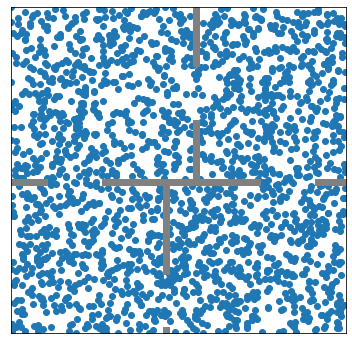

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(*rb_vec.T)
plot_walls(eval_tf_env.pyenv.envs[0].env.walls)
plt.show()

# Calculate qvalue distances

In [13]:
pdist = agent._get_pairwise_dist(rb_vec, aggregate=None).numpy()

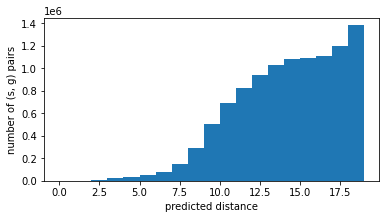

In [14]:
plt.figure(figsize=(6, 3))
plt.hist(pdist.flatten(), bins=range(20))
plt.xlabel('predicted distance')
plt.ylabel('number of (s, g) pairs')
plt.show()

# Calculate Euclidean distances

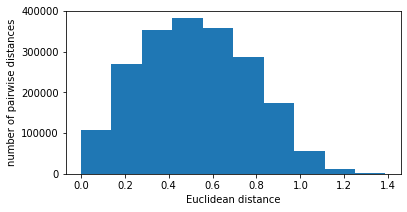

In [15]:
from scipy.spatial import distance
euclidean_dists = distance.pdist(rb_vec)

plt.figure(figsize=(6, 3))
plt.hist(euclidean_dists.flatten())
plt.xlabel('Euclidean distance')
plt.ylabel('number of pairwise distances')
plt.show()

# Initialize SoRB search policy

In [16]:
from sgm.planner import SoRBSearchPolicy
search_policy_type = "SoRB"
agent.initialize_search(rb_vec, max_search_steps=6)
search_policy = SoRBSearchPolicy(agent, pdist, rb_vec)

# Cleanup and evaluate SoRB

In [17]:
from sgm.evaluation import cleanup_and_eval

logdir = os.path.join(os.getcwd(), os.pardir, "logs")
eval_difficulty = 0.95
k_nearest = 5
eval_trials = 20
total_cleanup_steps = 100000
eval_period = 5000

logfolder = cleanup_and_eval(search_policy,
                             search_policy_type,
                             desc_name,
                             eval_tf_env,
                             logdir,
                             eval_difficulty=eval_difficulty,
                             k_nearest=k_nearest,
                             eval_trials=eval_trials,
                             total_cleanup_steps=total_cleanup_steps,
                             eval_period=eval_period)

SoRB has initial success rate 0.00
Evaluated initial SoRB success rate in 577.93 seconds
After filtering and 0 cleanup steps, SoRB has success rate 0.00
Took 5000 cleanup steps and evaluated SoRB success rate in 5814.08 seconds
After filtering and 5000 cleanup steps, SoRB has success rate 0.00
Took 5000 cleanup steps and evaluated SoRB success rate in 4321.41 seconds
After filtering and 10000 cleanup steps, SoRB has success rate 0.05
Took 5000 cleanup steps and evaluated SoRB success rate in 3677.49 seconds
Took 5000 cleanup steps and evaluated SoRB success rate in 4426.14 seconds
After filtering and 20000 cleanup steps, SoRB has success rate 0.30
Took 5000 cleanup steps and evaluated SoRB success rate in 3852.67 seconds
After filtering and 25000 cleanup steps, SoRB has success rate 0.20
Took 5000 cleanup steps and evaluated SoRB success rate in 4470.08 seconds
After filtering and 30000 cleanup steps, SoRB has success rate 0.10
Took 5000 cleanup steps and evaluated SoRB success rate in

# Load cleanup graphs

In [18]:
from sgm.utils.visualization import *

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_initial"))
initial_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_0_cleanup_steps/"))
filtered_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_{}_cleanup_steps/".format(total_cleanup_steps)))
cleaned_graph = search_policy._g.copy()

pruned_graph = nx.difference(filtered_graph, cleaned_graph)

# Visualize cleanup graphs

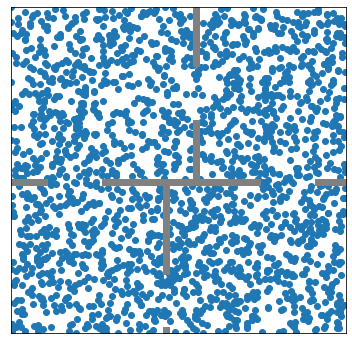

In [19]:
plot_points(search_policy.rb_vec, eval_tf_env)

Plotting 1968 nodes and 20030 edges


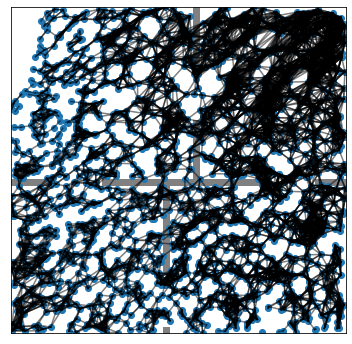

In [20]:
plot_graph(initial_graph, search_policy.rb_vec, eval_tf_env)

Plotting 1968 nodes and 9260 edges


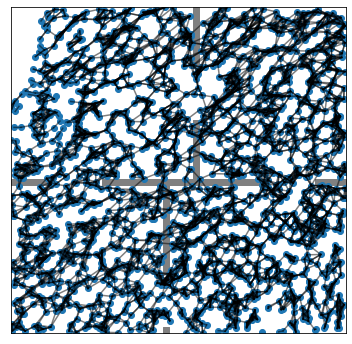

In [21]:
plot_graph(filtered_graph, search_policy.rb_vec, eval_tf_env)

Plotting 1968 nodes and 9086 edges


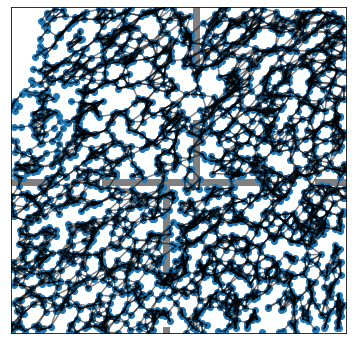

In [22]:
plot_graph(cleaned_graph, search_policy.rb_vec, eval_tf_env)

Plotting 1968 nodes and 174 edges


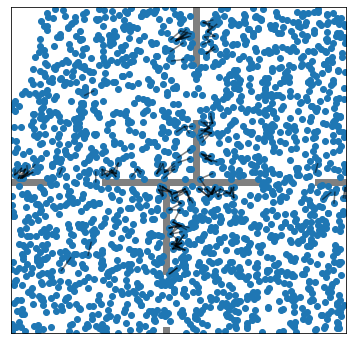

In [23]:
plot_graph(pruned_graph, search_policy.rb_vec, eval_tf_env)